# Tourism & Economic Analysis

In [1]:
import IPython.display as disp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling
import pycountry
import seaborn as sns
from scipy.stats import boxcox, kurtosis, kurtosistest, skew, skewtest
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
t_df = pd.read_pickle("../data/processed/Tourism.pickle")
e_m_df = pd.read_pickle("../data/processed/Economic_MADDISON.pickle")
e_w_df = pd.read_pickle("../data/processed/Economic_WDI.pickle")

## MADDISON Real GDP

### Join sources into dataframe

In [2]:
# Join Maddison data onto tourism data
m_t_df = t_df.join(e_m_df)

In [3]:
# Drop records without Maddison data
m_t_df.dropna(subset=['Maddison GDPPC'],inplace=True)
x = m_t_df.drop('Maddison GDPPC', axis='columns')
y = m_t_df['Maddison GDPPC']

### Descriptive Statistics

In [4]:
m_t_df.describe()

,ST.INT.ARVL,ST.INT.XPND.MP.ZS,ST.INT.XPND.CD,ST.INT.DPRT,ST.INT.RCPT.XP.ZS,ST.INT.RCPT.CD,Tourist Defecit,Tourism Net,Tourist Avg Net,Population Estimate,ST.INT.ARVL.PER.CAPITA,ST.INT.DPRT.PER.CAPITA,Maddison GDPPC
count,3369.000,3104.000,3327.000,2001.000,3102.000,3388.000,1996.000,3308.000,3264.000,3308.000,3184.000,1901.000,3505.000
mean,5241600.712,6.349,5465610097.445,8412258.156,13.160,5595134479.184,-568146.979,242438851.656,1000.404,41424853.446,0.464,0.446,14701.433
std,11027533.235,4.216,15797819021.536,16163083.501,13.744,15570291398.402,13280531.602,10200598410.732,851.342,146223039.400,0.796,0.515,17328.473
min,700.000,0.183,310000.000,2700.000,0.001,100000.000,-75860000.000,-205680000000.000,0.282,69670.000,0.000,0.000,432.000
25%,319000.000,3.599,146500000.000,662000.000,4.021,178800000.000,-1301000.000,-102000000.000,471.891,3679013.750,0.031,0.054,2756.000
50%,1204000.000,5.434,583000000.000,2294000.000,8.175,888500000.000,43500.000,63000000.000,821.986,9387730.500,0.168,0.209,8173.000
75%,4856000.000,7.752,3624000000.000,8030000.000,17.225,4564250000.000,1322250.000,919500000.000,1258.107,27036160.750,0.554,0.704,20912.000
max,84452000.000,42.441,250112000000.000,135130000.000,81.789,249183000000.000,59910000.000,99139000000.000,6675.197,1403500365.000,9.632,3.456,156144.000


### Basic Correlations

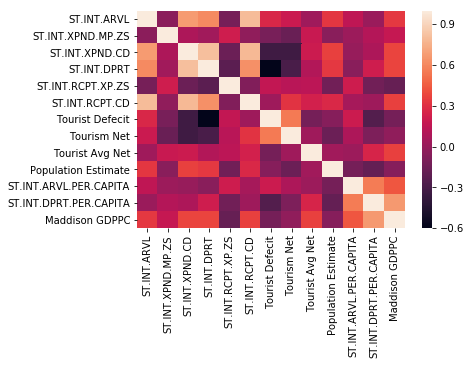

In [5]:
sns.heatmap(m_t_df.corr())

### Outlier Detection

In [6]:
skews = m_t_df.skew(axis=1)

In [7]:
skews.sort_values(ascending=False).head(50)

Country Code  Year
TJK           2014   3.154
              2015   3.143
UGA           2002   3.066
              2001   3.066
              2003   3.050
              2000   3.047
              1999   3.034
SAU           2002   3.000
CUB           2015   3.000
              2005   3.000
              2012   3.000
              2013   3.000
              2008   3.000
              2014   3.000
              2011   3.000
              2006   3.000
              2007   3.000
              2010   3.000
              2009   3.000
              2004   3.000
              2003   3.000
              2000   3.000
              1999   3.000
              2001   3.000
              1998   3.000
              2002   3.000
              1997   3.000
              1996   3.000
              1995   2.999
ZWE           2007   2.993
              2006   2.992
              2008   2.989
              1999   2.981
              2004   2.977
              2005   2.912
BDI           1999   2.837
ZWE      

### Exploratory Modeling

In [8]:
# Drop large n/a variables                    
print(m_t_df.describe().transpose()['count'])
m_t_df = m_t_df.drop(['ST.INT.DPRT','Tourist Defecit','ST.INT.DPRT.PER.CAPITA'],axis='columns').dropna(how='any')

ST.INT.ARVL              3369.000
ST.INT.XPND.MP.ZS        3104.000
ST.INT.XPND.CD           3327.000
ST.INT.DPRT              2001.000
ST.INT.RCPT.XP.ZS        3102.000
ST.INT.RCPT.CD           3388.000
Tourist Defecit          1996.000
Tourism Net              3308.000
Tourist Avg Net          3264.000
Population Estimate      3308.000
ST.INT.ARVL.PER.CAPITA   3184.000
ST.INT.DPRT.PER.CAPITA   1901.000
Maddison GDPPC           3505.000
Name: count, dtype: float64


#### Linear Regression

In [9]:
regression = LinearRegression()
regression.fit(x,y)
print(regression.score(x, y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [57]:
print([a + ':' + str(round(b, 2)) for a, b in zip(
    x.columns, regression.coef_,)])

['ST.INT.ARVL:0.0', 'ST.INT.XPND.MP.ZS:596.33', 'ST.INT.XPND.CD:0.0', 'ST.INT.RCPT.XP.ZS:-395.58', 'ST.INT.RCPT.CD:-0.0', 'Tourism Net:0.0', 'Tourist Avg Net:6.87', 'Population Estimate:-0.0', 'ST.INT.ARVL.PER.CAPITA:8703.82']


array([[-0.46505309, -0.97427928, -0.34534248, ..., -0.91282038,
        -0.27249565, -0.46345671],
       [-0.46649918, -0.97961435, -0.34498653, ..., -0.80290084,
        -0.27258823, -0.46963057],
       [-0.48078994, -1.06252846, -0.34569843, ..., -0.85015355,
        -0.27258304, -0.53621449],
       ...,
       [-0.33099213, -0.21589888, -0.31971398, ..., -1.06123658,
        -0.19397167, -0.43388531],
       [-0.31593579,  0.23261135, -0.3134255 , ..., -1.06811058,
        -0.19163747, -0.42360424],
       [-0.30649368, -0.02641465, -0.32238361, ..., -1.07191942,
        -0.18925773, -0.41887138]])